Importing required libraries

In [73]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")

Loading the dataset


In [ ]:
/kaggle/input/credit-risk-dataset/credit_risk_dataset.csv

In [74]:
df = pd.read_csv('credit_risk_dataset.csv')

In [7]:
df

,person_age,person_income,person_home_ownership,person_emp_length,loan_intent,loan_grade,loan_amnt,loan_int_rate,loan_status,loan_percent_income,cb_person_default_on_file,cb_person_cred_hist_length
0,22,59000,RENT,123.0,PERSONAL,D,35000,16.02,1,0.59,Y,3
1,21,9600,OWN,5.0,EDUCATION,B,1000,11.14,0,0.10,N,2
2,25,9600,MORTGAGE,1.0,MEDICAL,C,5500,12.87,1,0.57,N,3
3,23,65500,RENT,4.0,MEDICAL,C,35000,15.23,1,0.53,N,2
4,24,54400,RENT,8.0,MEDICAL,C,35000,14.27,1,0.55,Y,4


In [75]:
df.shape

(32581, 12)

In [76]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32581 entries, 0 to 32580
Data columns (total 12 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   person_age                  32581 non-null  int64  
 1   person_income               32581 non-null  int64  
 2   person_home_ownership       32581 non-null  object 
 3   person_emp_length           31686 non-null  float64
 4   loan_intent                 32581 non-null  object 
 5   loan_grade                  32581 non-null  object 
 6   loan_amnt                   32581 non-null  int64  
 7   loan_int_rate               29465 non-null  float64
 8   loan_status                 32581 non-null  int64  
 9   loan_percent_income         32581 non-null  float64
 10  cb_person_default_on_file   32581 non-null  object 
 11  cb_person_cred_hist_length  32581 non-null  int64  
dtypes: float64(3), int64(5), object(4)
memory usage: 3.0+ MB


In [77]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
person_age,32581.0,27.734600,6.348078,20.00,23.00,26.00,30.00,144.00
person_income,32581.0,66074.848470,61983.119168,4000.00,38500.00,55000.00,79200.00,6000000.00
person_emp_length,31686.0,4.789686,4.142630,0.00,2.00,4.00,7.00,123.00
loan_amnt,32581.0,9589.371106,6322.086646,500.00,5000.00,8000.00,12200.00,35000.00
loan_int_rate,29465.0,11.011695,3.240459,5.42,7.90,10.99,13.47,23.22
loan_status,32581.0,0.218164,0.413006,0.00,0.00,0.00,0.00,1.00
loan_percent_income,32581.0,0.170203,0.106782,0.00,0.09,0.15,0.23,0.83
cb_person_cred_hist_length,32581.0,5.804211,4.055001,2.00,3.00,4.00,8.00,30.00


In [78]:
df.isnull().sum()

person_age                       0
person_income                    0
person_home_ownership            0
person_emp_length              895
loan_intent                      0
loan_grade                       0
loan_amnt                        0
loan_int_rate                 3116
loan_status                      0
loan_percent_income              0
cb_person_default_on_file        0
cb_person_cred_hist_length       0
dtype: int64

Summary of the variables:As
person_age has unexpectedge result: the max value is 144 which is unlikely to be tru
person_emp_length has 895 NAse.
person_emp_length has a max value of 123 which is not possibl
loan_interest_rate has 3116 NAsh.

Handling Null values

In [79]:
# Filling the missing values in the dataset with their median values.
df['person_emp_length'] = df['person_emp_length'].fillna(df['person_emp_length'].median())
df['loan_int_rate'] = df['loan_int_rate'].fillna(df['loan_int_rate'].median())

In [80]:
df.isnull().sum()

person_age                    0
person_income                 0
person_home_ownership         0
person_emp_length             0
loan_intent                   0
loan_grade                    0
loan_amnt                     0
loan_int_rate                 0
loan_status                   0
loan_percent_income           0
cb_person_default_on_file     0
cb_person_cred_hist_length    0
dtype: int64

In [81]:
# checking for duplicate rows in the dataset
df.duplicated().sum()

165

In [82]:
df.drop_duplicates(inplace = True)

In [83]:
df.columns

Index(['person_age', 'person_income', 'person_home_ownership',
       'person_emp_length', 'loan_intent', 'loan_grade', 'loan_amnt',
       'loan_int_rate', 'loan_status', 'loan_percent_income',
       'cb_person_default_on_file', 'cb_person_cred_hist_length'],
      dtype='object')

In [84]:
num_col = ['person_age', 'person_income','person_emp_length', 'loan_amnt','loan_int_rate', 'loan_percent_income', 'cb_person_cred_hist_length']

In [85]:
# Checking for outliers:
def find_outliers(df,col):
    Q1 = df[col].quantile(0.25)
    Q3 = df[col].quantile(0.75)
    IQR = Q3 - Q1
    return df[(df[col] < (Q1-1.5*IQR)) | (df[col] > (Q3+1.5*IQR))]
    


In [86]:
for col in num_col:
    print(find_outliers(df,col).shape)

(1491, 12)
(1478, 12)
(852, 12)
(1679, 12)
(70, 12)
(650, 12)
(1139, 12)


In [87]:
# Removing outliers:
def remove_outliers(df,col):
    Q1 = df[col].quantile(0.25)
    Q3 = df[col].quantile(0.75)
    IQR = Q3 - Q1
    Lower_limit = Q1-1.5*IQR
    Upper_limit = Q3+1.5*IQR
    df[col] = np.where(df[col] < Lower_limit, Lower_limit,df[col])
    df[col] = np.where(df[col] > Upper_limit, Upper_limit, df[col])
    return df
    

In [88]:
for col in num_col:
    remove_outliers(df,col)

Plotting histograms for numerical columns

<function matplotlib.pyplot.show(close=None, block=None)>

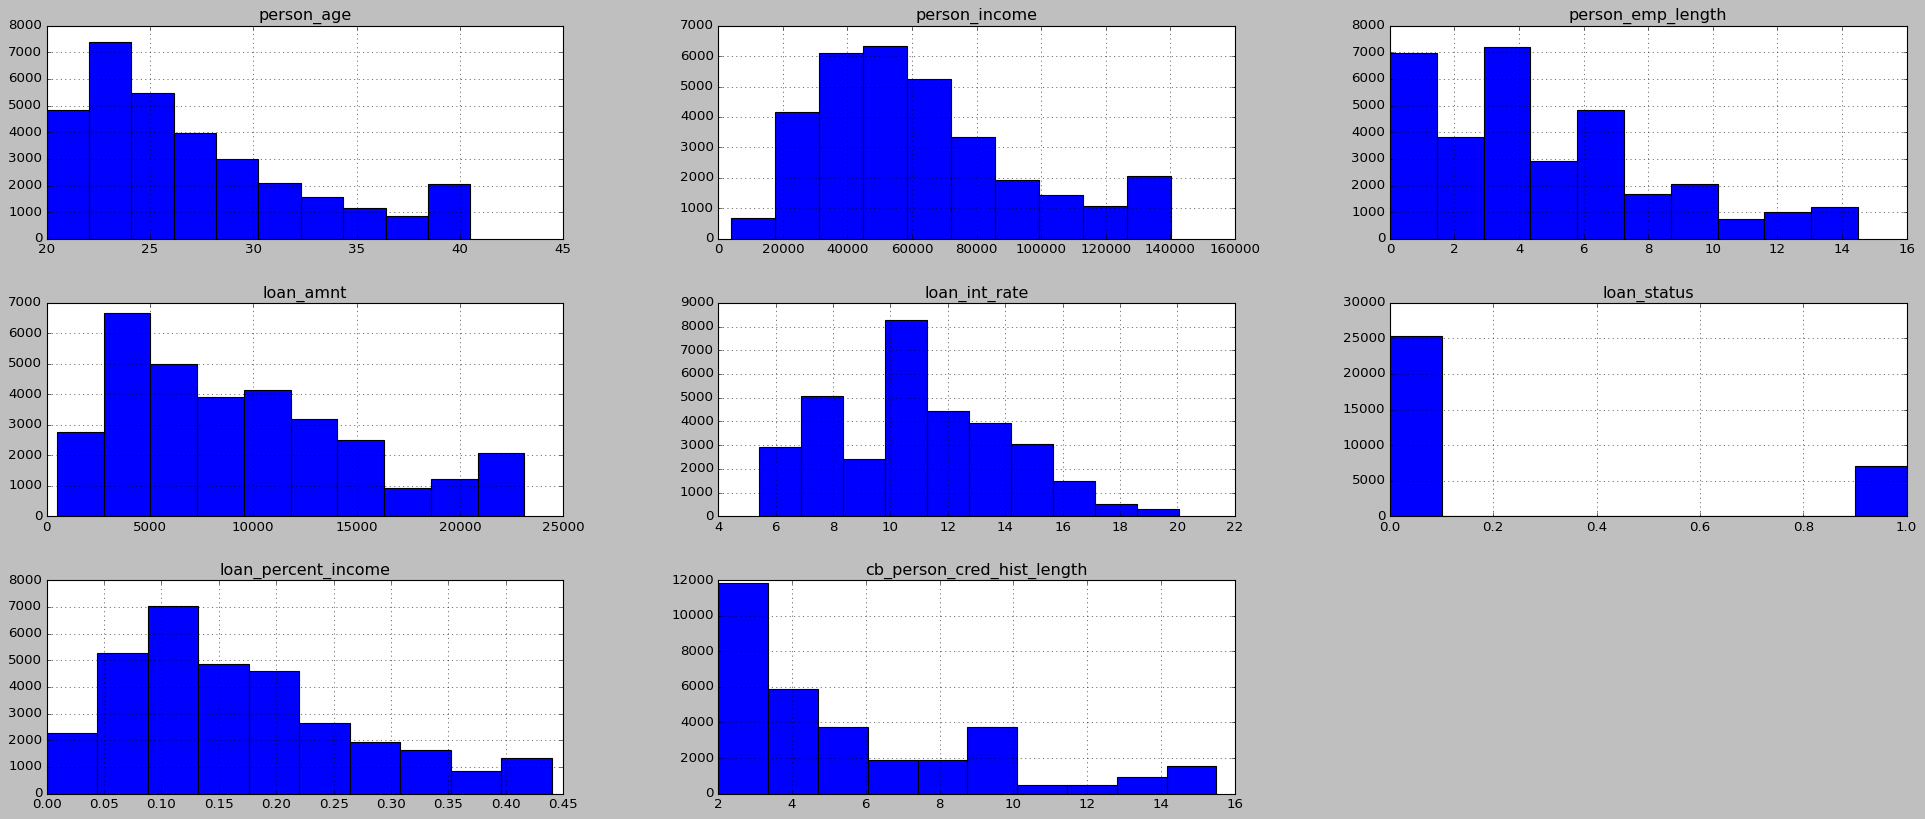

In [105]:
df.hist(figsize = (30,12))
plt.show

Plotting countplots for categotical columns:

In [92]:
categorical_columns = df.select_dtypes('object').columns
categorical_columns

Index(['person_home_ownership', 'loan_intent', 'loan_grade',
       'cb_person_default_on_file'],
      dtype='object')

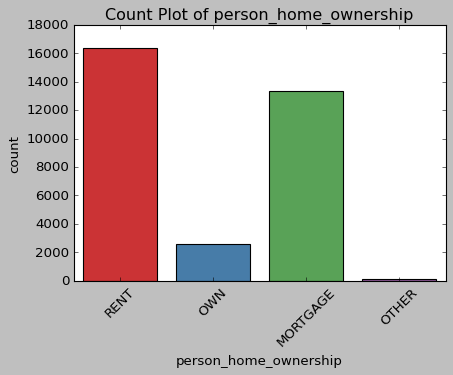

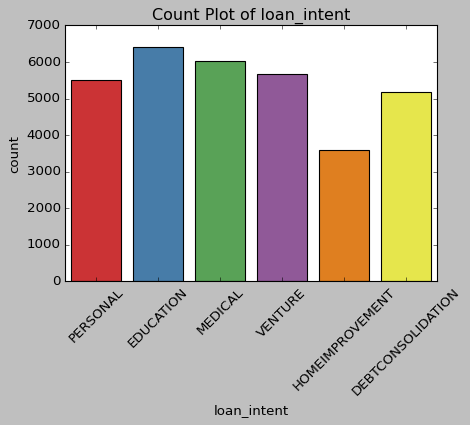

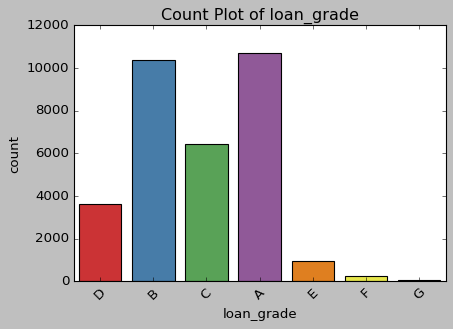

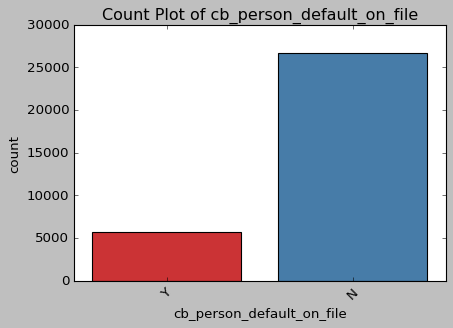

In [99]:
for col in categorical_columns:
    plt.figure(figsize=(6, 4))
    sns.countplot(x = col, data=df, palette = 'Set1')
    plt.title(f'Count Plot of {col}')
    plt.xticks(rotation=45)
    plt.show()
   

    

Observations: 
1. Loan Intent are almost equally distributed among various indended purposes of the loan.
2. Most of the people who are availing the loan do not own their own house.
3. Among the Loan Grades, Grade A and B comprises the most.   Grade 
A: The borrower has a high creditworthiness, indicating low risk.   Garde 
B: The borrower is relatively low-risk, but not as creditworthy as Grade 

4. Taking into account the historical default of the individua, most of the people who availed loan do not have any history of defaults.s.A.

Analyzing the target variable 'Loan Status':

Loan status: 0 indicates non-default and 1 indicates default.   
0: Non-default - The borrower successfully repaid the loan as agreed, and there was no default.   
1: Default - The borrower failed to repay the loan according to the agreed-upon terms and defaulted on the loan.

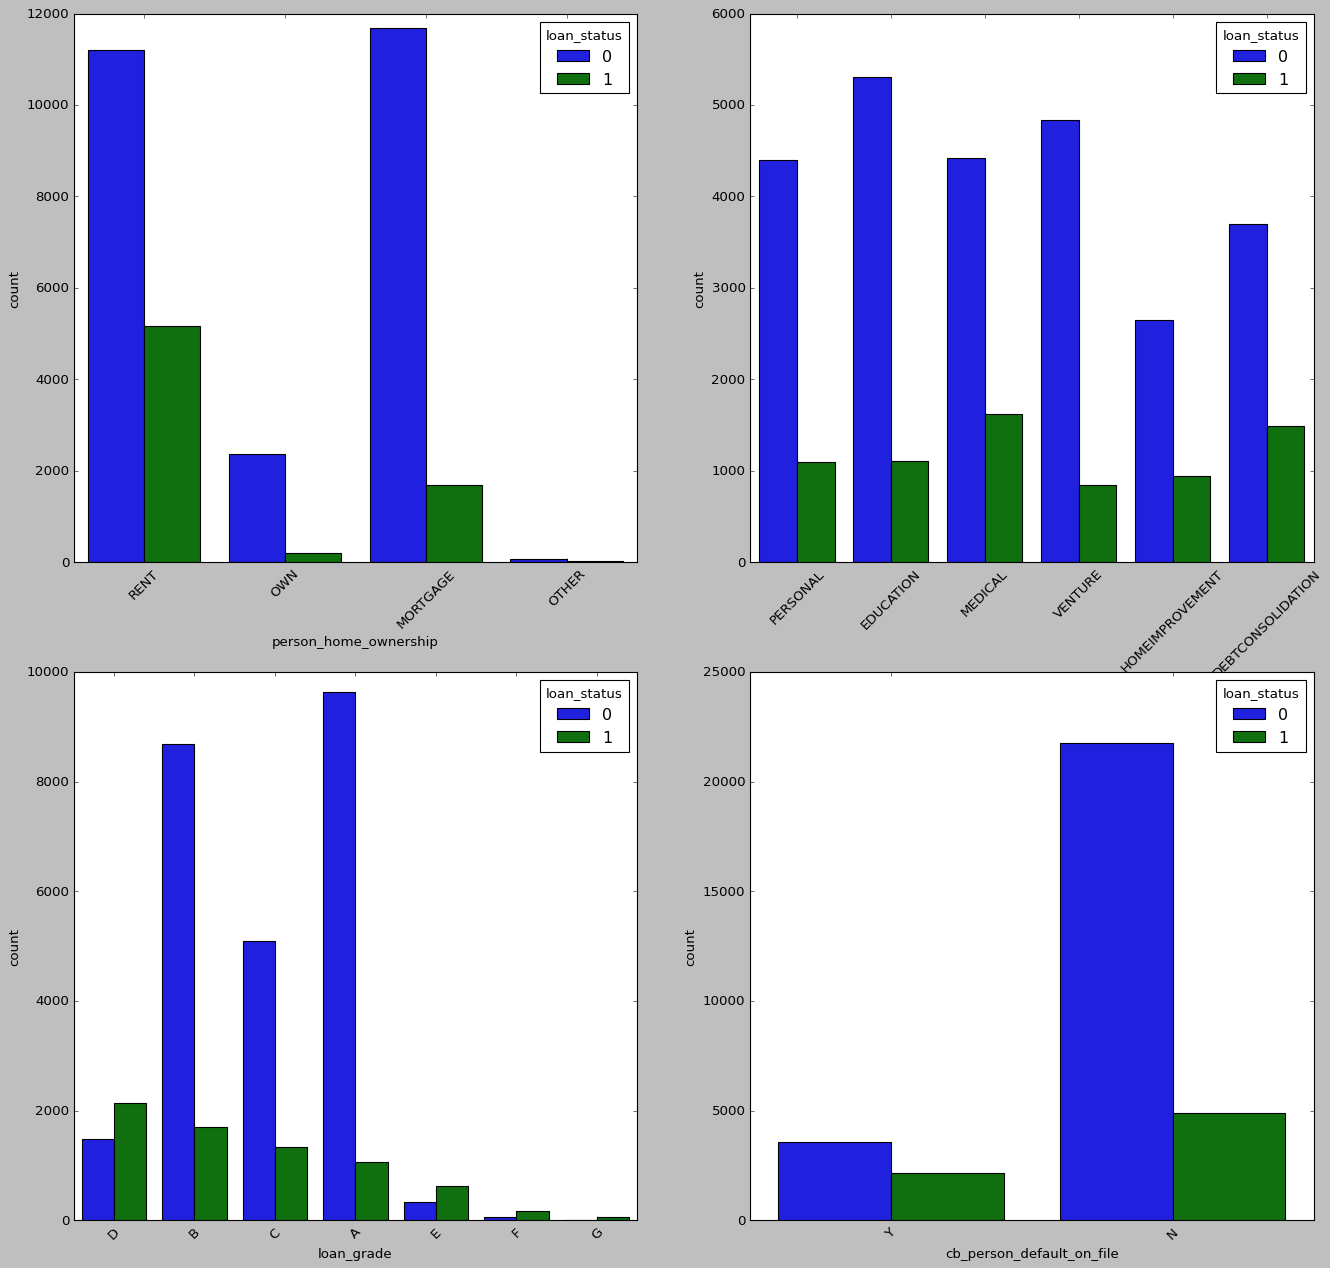

In [100]:
# Relationship between Loan Status and other features:
plt.figure(figsize =(20,60))
for i in enumerate(categorical_columns):
    plt.subplot(6,2, i[0]+1)
    sns.countplot(x = i[1], hue='loan_status', data =df)
    plt.xticks(rotation=45)

In [119]:
df['loan_status'].value_counts()

loan_status
0    25327
1     7089
Name: count, dtype: int64

<Axes: ylabel='count'>

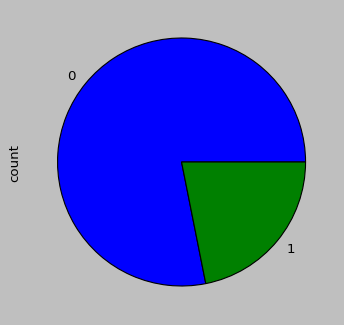

In [101]:
plt.figure(figsize=(5, 5))
df["loan_status"].value_counts().plot.pie()

In [ ]:
Feature encoding:

In [102]:
# categorical features, use one hot encoding here 
df = pd.get_dummies(df, columns=['person_home_ownership', 'loan_intent','loan_grade', 'cb_person_default_on_file'])

<Axes: title={'center': 'Correlation with the target variable'}>

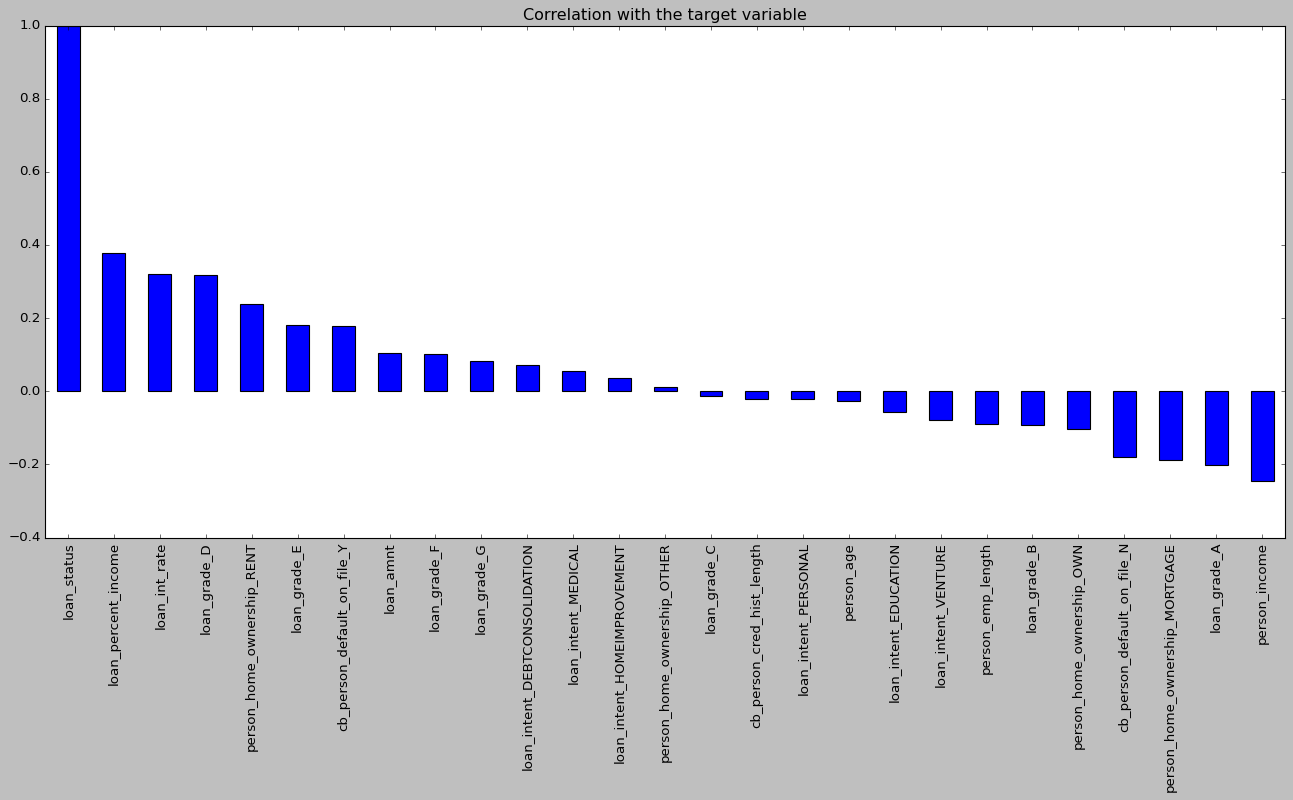

In [103]:
# Build a correlation of all predictors with the target variable.
plt.figure(figsize=(20,8))
plt.style.use('classic')
df.corr()['loan_status'].sort_values(ascending = False).plot(kind='bar',title = 'Correlation with the target variable')

Observations:
1. The above plot shows that the correlation between the target variable (loan status) and the loan_percent_income, loan_int_rate, are highly positively correlated and cb_person_cred_hist_length has small correlation with the target variable.
2. person_income, person_emp_length, and person_age: has negative effect on loan_status being default, which means the larger these variables, the less likely the person is risky.
3. loan_percent_income, loan_int_rate, and loan_amnt: has positive effect on loan_status being default, which means the larger these variables, the more likely the person is risky.

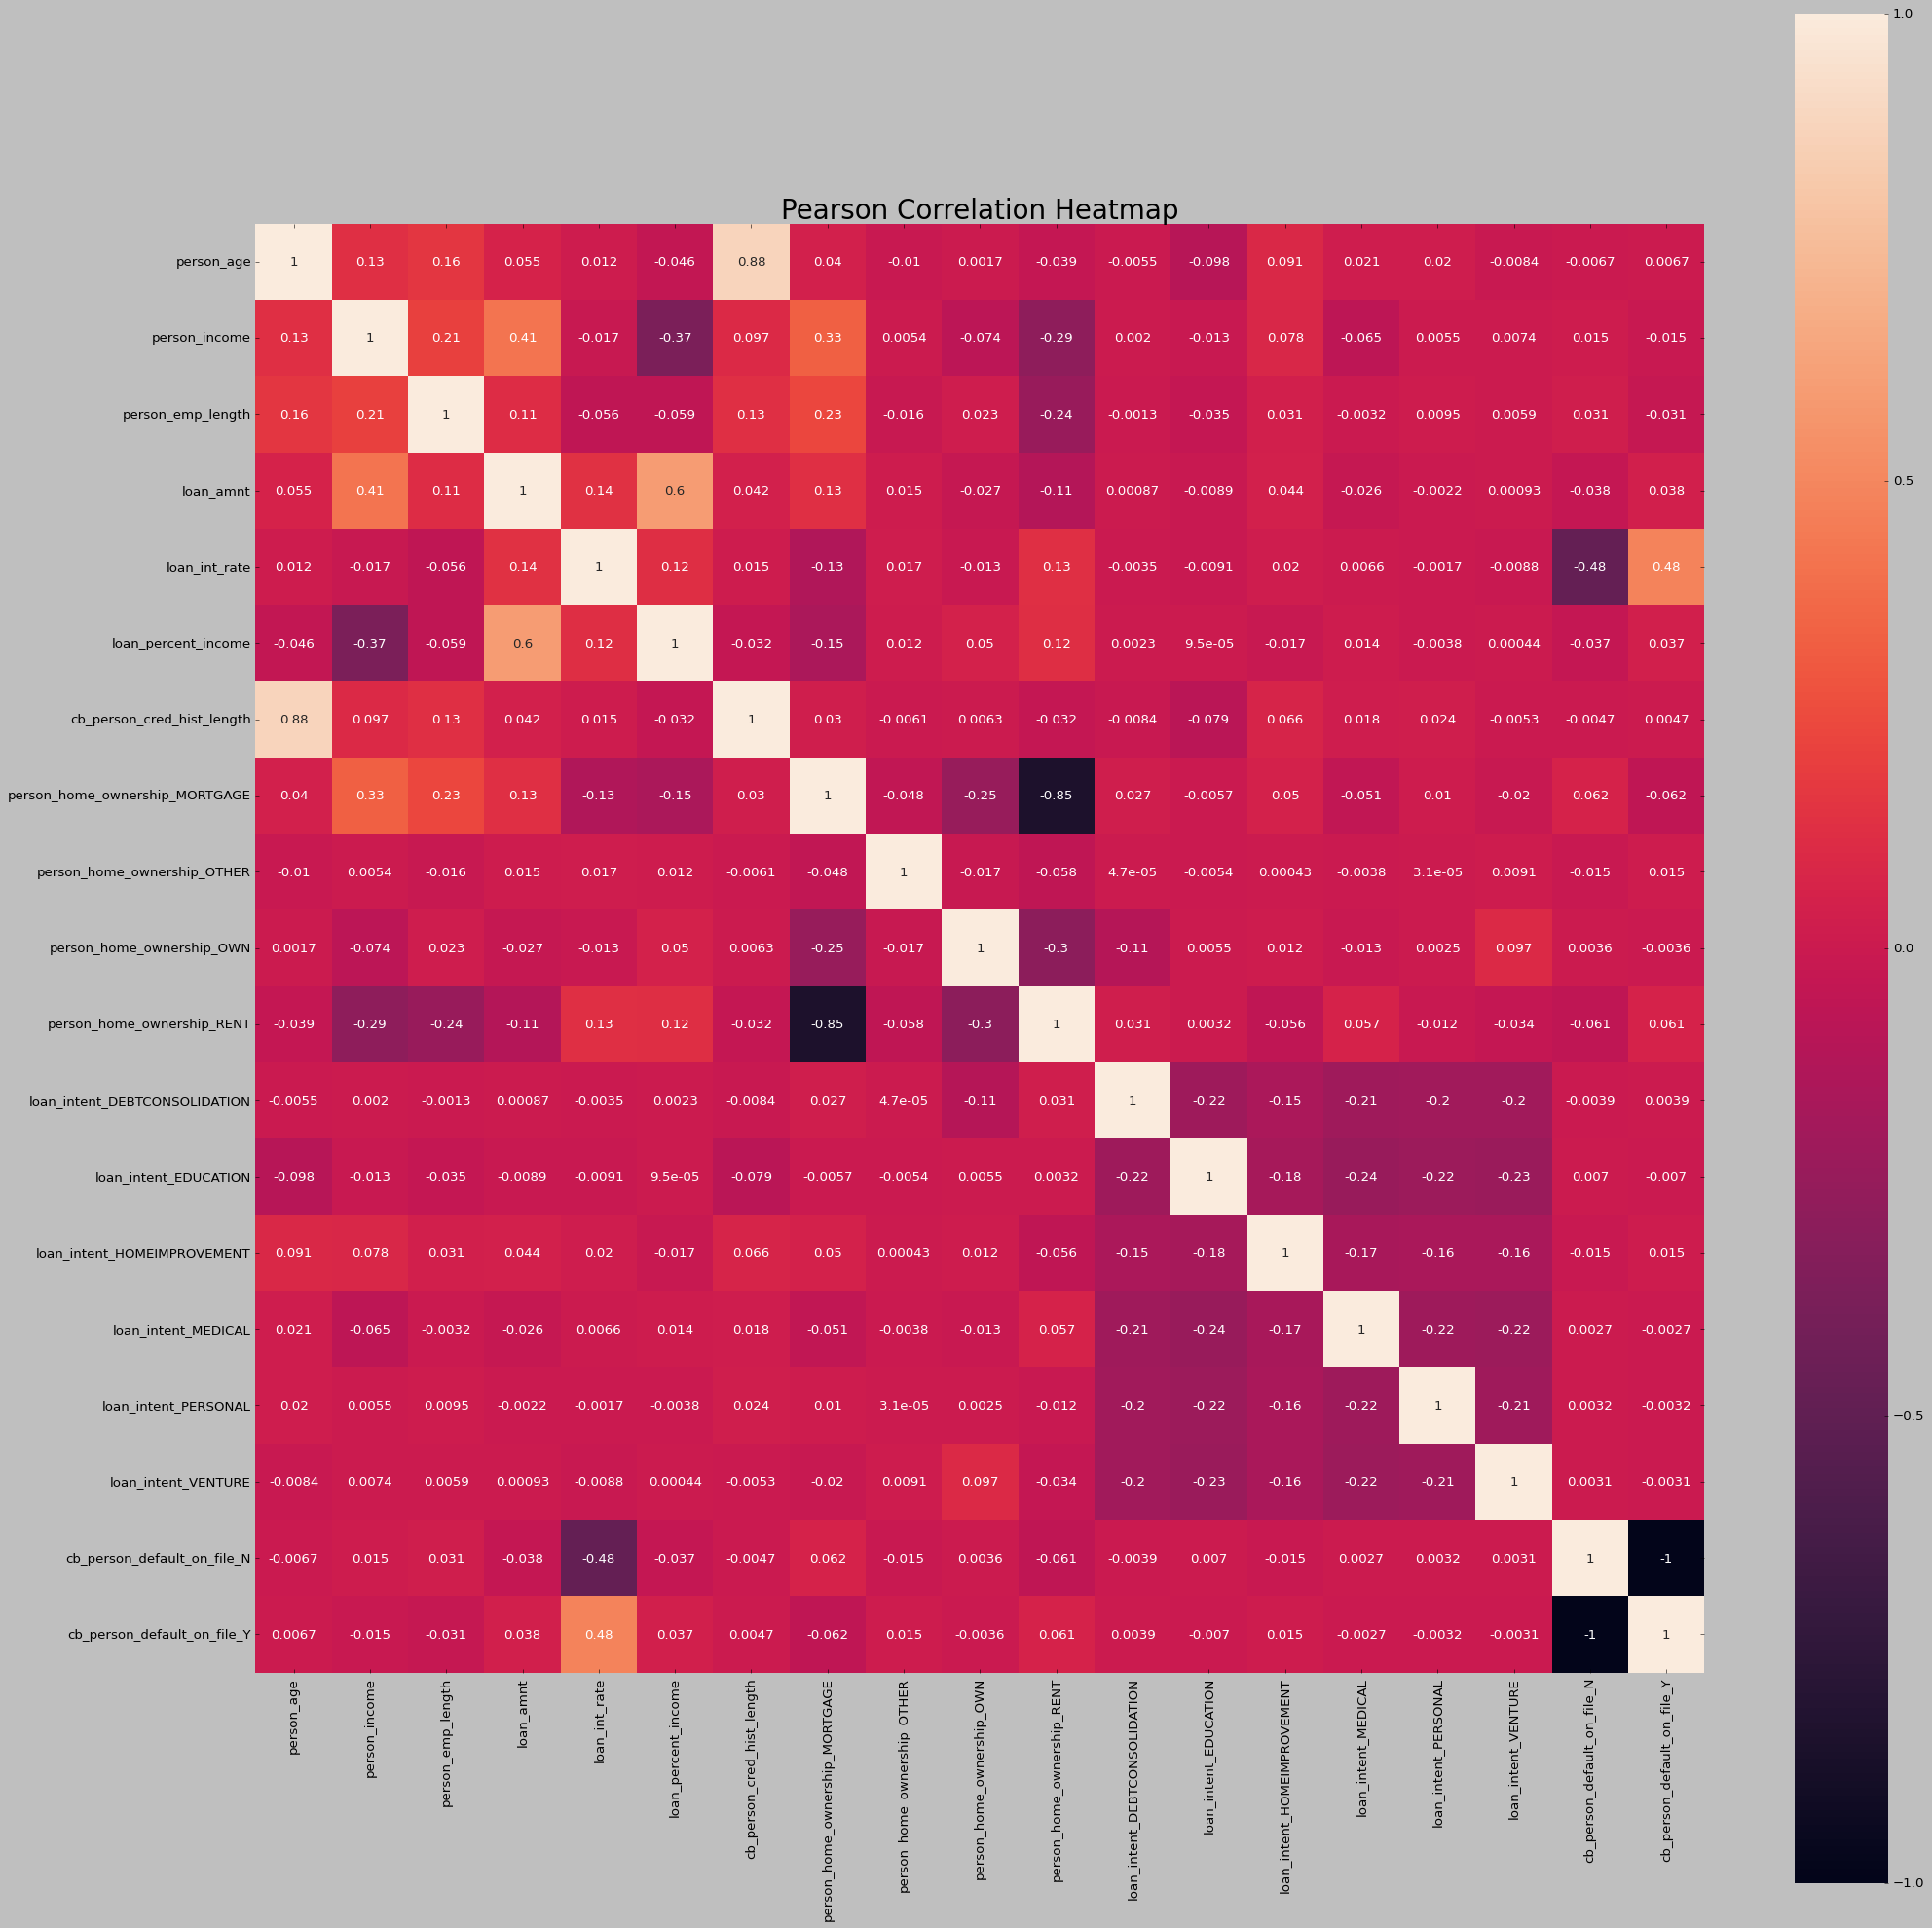

In [121]:
# checking correlation among the features
plt.figure(figsize=(30,30))

sns.heatmap(
    df.drop(['loan_status','loan_grade_A','loan_grade_B','loan_grade_C','loan_grade_D','loan_grade_E','loan_grade_F','loan_grade_G'],axis=1).corr(), 
            square=True, annot=True)
plt.title("Pearson Correlation Heatmap", size = 25)
plt.show()

Correlation among the features:

The Pearson correlation coefficient (also known as the “product-moment correlation coefficient”) is a measure of the linear association between two variables X and Y. It has a value between -1 and 1

where:
-1 indicates a perfectly negative linear correlation between two variables
0 indicates no linear correlation between two variables
1 indicates a perfectly positive linear correlation between two variables.

The above Pearson correlation heatmap indicates a high collinearity between the cb_person_cred_hist_length and the person_age. Older people are more likely to have longer credit history.
person_income is slightly, positively correlated with person_age, and is also slightly, positively correlated with person_emp_length. Older people is likely to have more employment length.  
loan_percent_income is correlated to loan_amnt and person_income, which is quite reasonable since it is ratio of person_income to loan_amnt. 
person_income is positively correlated with loan_amnt, higher income borrowers are more likely to pay high loan amount.

Summary:The following has been included in the above Descriptive - Statistical Analysis of the Credit Risk data:

Exploration of each variab and itsit distribioned across the dataTargetnse Variable and its relationships with other categorical and quantitive variables.
Association and Correlations of the variables..